In [1]:
# Libraries that this notebook will use:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from datascience import *
from matplotlib.colors import ListedColormap
import re
# Helps the maps display nicely in the notebook:
%matplotlib inline
plt.rcParams['figure.figsize'] = [30, 20]
# Tells the notebook not to display warnings:
import warnings
warnings.filterwarnings('ignore')
from IPython.display import IFrame

# HOLC areas
**We have data for these areas in California: Fresno, Los Angeles, San Francisco, San Jose, Stockton, San Diego, Oakland.**

In [2]:
from matplotlib.colors import ListedColormap

# Create a ListedColormap object called holc_cmap, pass in the list of colors
holc_cmap = ListedColormap(['green', 'blue', 'yellow', 'red'], name='holc_colors')

# San Francisco

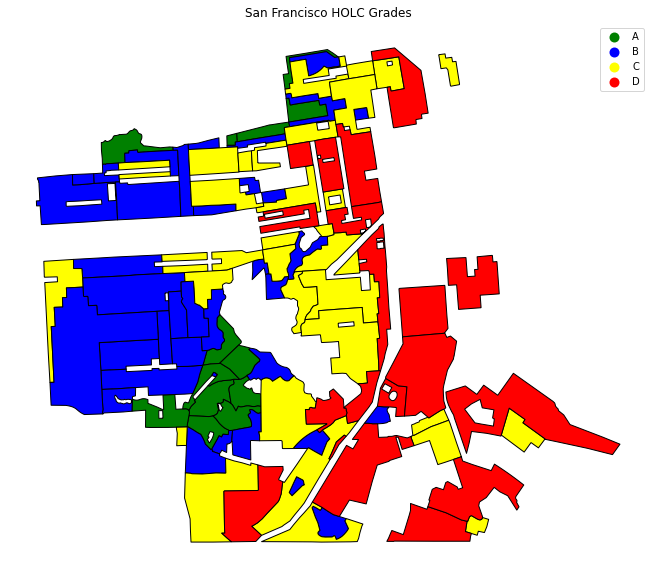

In [3]:
sf = gpd.read_file('holc_sf')
sf.plot(column = 'holc_grade', cmap = holc_cmap, legend = True, figsize=[18, 10])
plt.title('San Francisco HOLC Grades')
plt.axis('off');

In [4]:
census2000 = gpd.read_file("census2000")
census2000.head()

,AREA,PERIMETER,TR06_D00_,TR06_D00_I,STATE,COUNTY,TRACT,NAME,LSAD,LSAD_TRANS,geometry
0,0.058290,1.303878,2,1,06,093,0004,0004,TR,None,"POLYGON ((-122.87032 42.00331, -122.80008 42.0..."
1,0.155340,2.227876,3,2,06,093,0003,0003,TR,None,"POLYGON ((-122.36818 42.00932, -122.28953 42.0..."
2,0.346458,3.272025,4,3,06,093,0005,0005,TR,None,"POLYGON ((-123.23076 42.00384, -123.19236 42.0..."
3,0.148798,2.018557,5,4,06,093,0002,0002,TR,None,"POLYGON ((-122.16133 42.00764, -122.16044 42.0..."
4,0.227852,3.327617,6,5,06,015,000202,0002.02,TR,None,"POLYGON ((-124.21161 41.99846, -124.12619 41.9..."


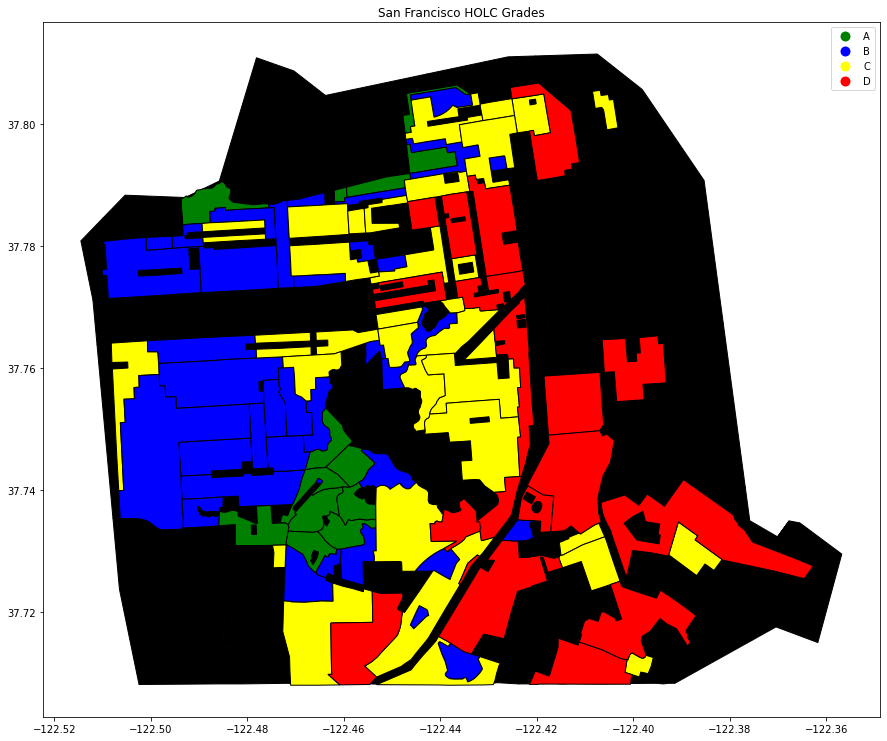

In [12]:
sf_county_1 = census2000[census2000['COUNTY']=='075']


geometries_str = sf_county_1['geometry'].apply(lambda x: x.wkt).values
sf_county_2 = sf_county_1[['-123' not in i for i in geometries_str]]

geometries_str_2 = sf_county_2['geometry'].apply(lambda x: x.wkt).values
sf_county_3 = sf_county_2[['37.82' not in i for i in geometries_str_2]]
base = sf_county_3.plot(figsize=(15, 15), color='black')

sf = gpd.read_file('holc_sf')
sf.plot(ax =base, column = 'holc_grade', cmap = holc_cmap, legend = True, figsize=[18, 10])
plt.title('San Francisco HOLC Grades');
# plt.axis('off');

In [6]:
# ! pip install osmnx

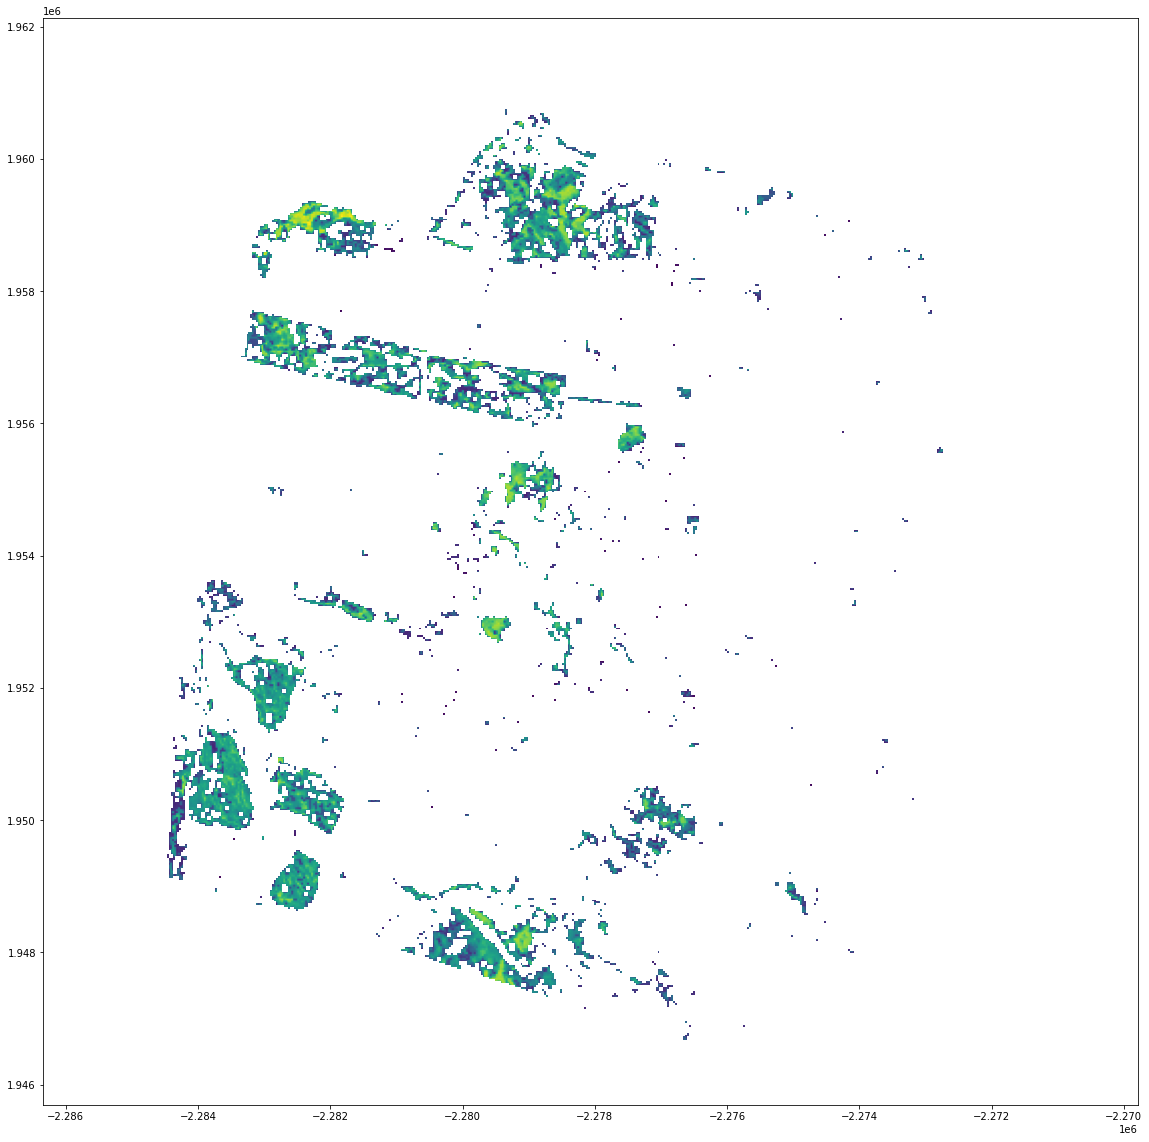

<AxesSubplot:>

In [13]:
import rasterio
from rasterio.plot import show
from rasterstats import zonal_stats
import osmnx as ox
# All of the above required pip install on local environment
import os


# File path
data_dir = "CA_trees2016"
dem_fp = os.path.join(data_dir, "2016_tree_canopy_SF.tif")

# Read the Digital Elevation Model for Helsinki
dem = rasterio.open(dem_fp)
show(dem)


# **https://rasterio.readthedocs.io/en/latest/topics/plotting.html**

# Keywords for Kallio and Helsinki in such format that they can be found from OSM
sf_query = "Kallio, Helsinki, Finland"

# Retrieve the geometries of those areas using osmnx
sf_place = ox.gdf_from_place(kallio_q)

# Reproject to same coordinate system as the
sf_place = sf_place.to_crs(crs=dem.crs)

type(sf_place)

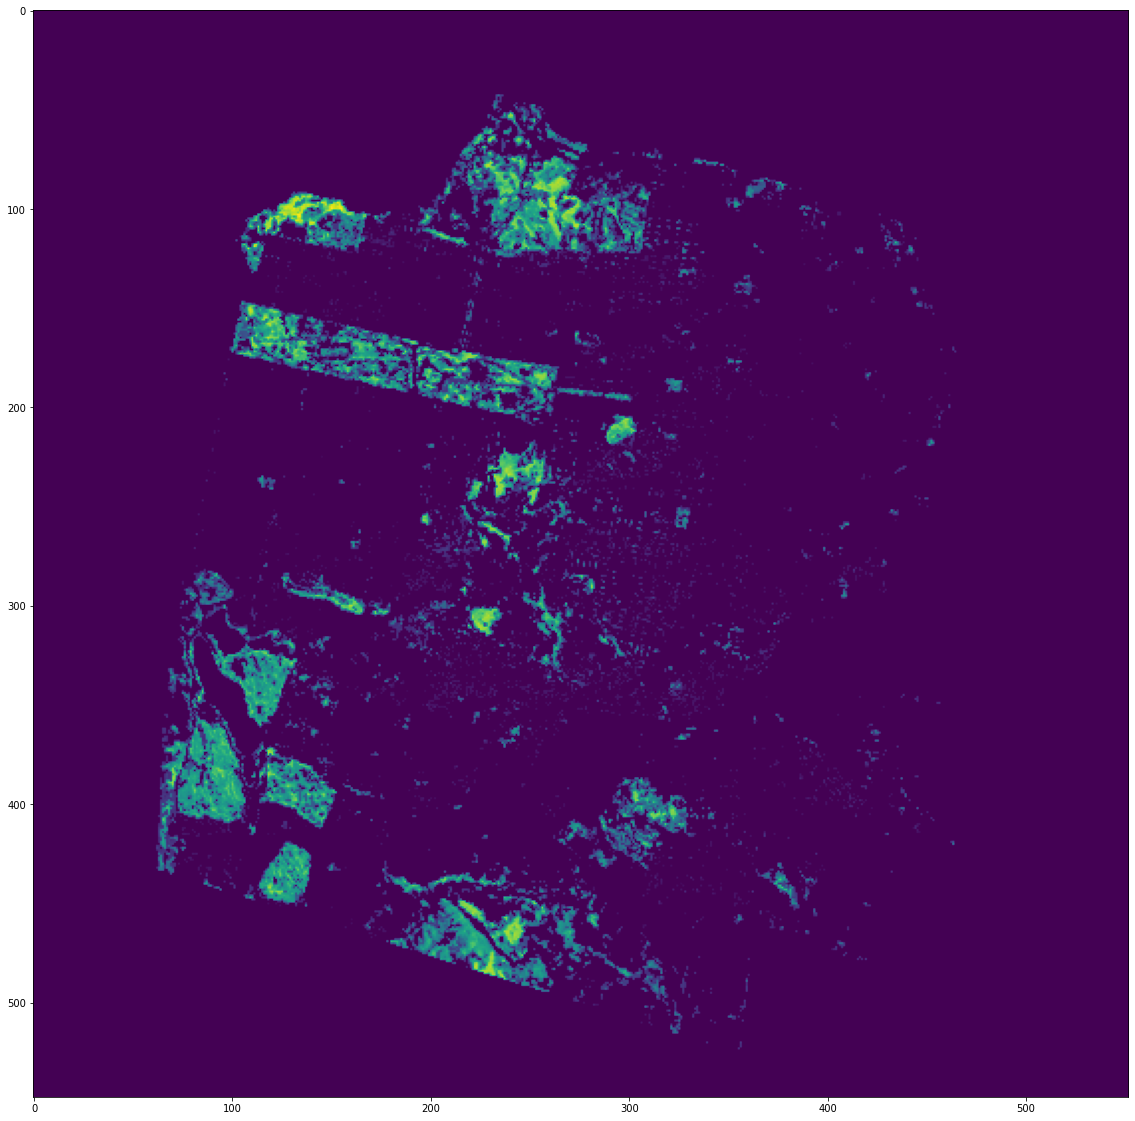

In [8]:
import rasterio
src = rasterio.open("CA_trees2016/2016_tree_canopy_SF.tif")
plt.imshow(src.read(1))
plt.show()

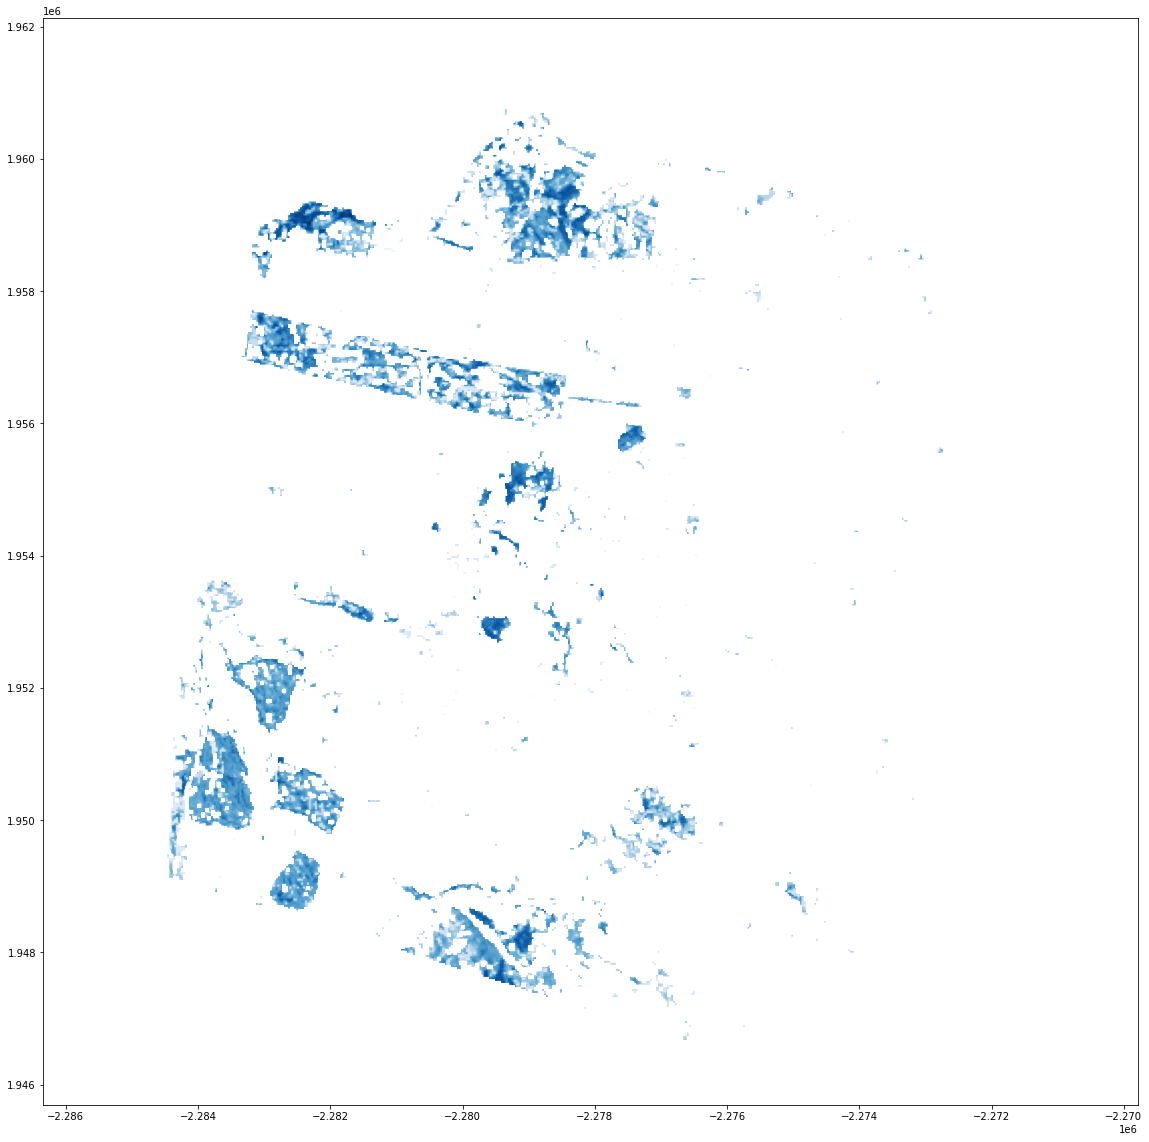

In [11]:
# from rasterio.plot import show
# base = sf_county_3.plot(figsize=(15, 15), color='black')
# sf.plot(ax =base, column = 'holc_grade', cmap = holc_cmap, legend = True, figsize=[18, 10])
# plt.title('San Francisco HOLC Grades')
# plt.show()

show(src, cmap='Blues')
plt.show()

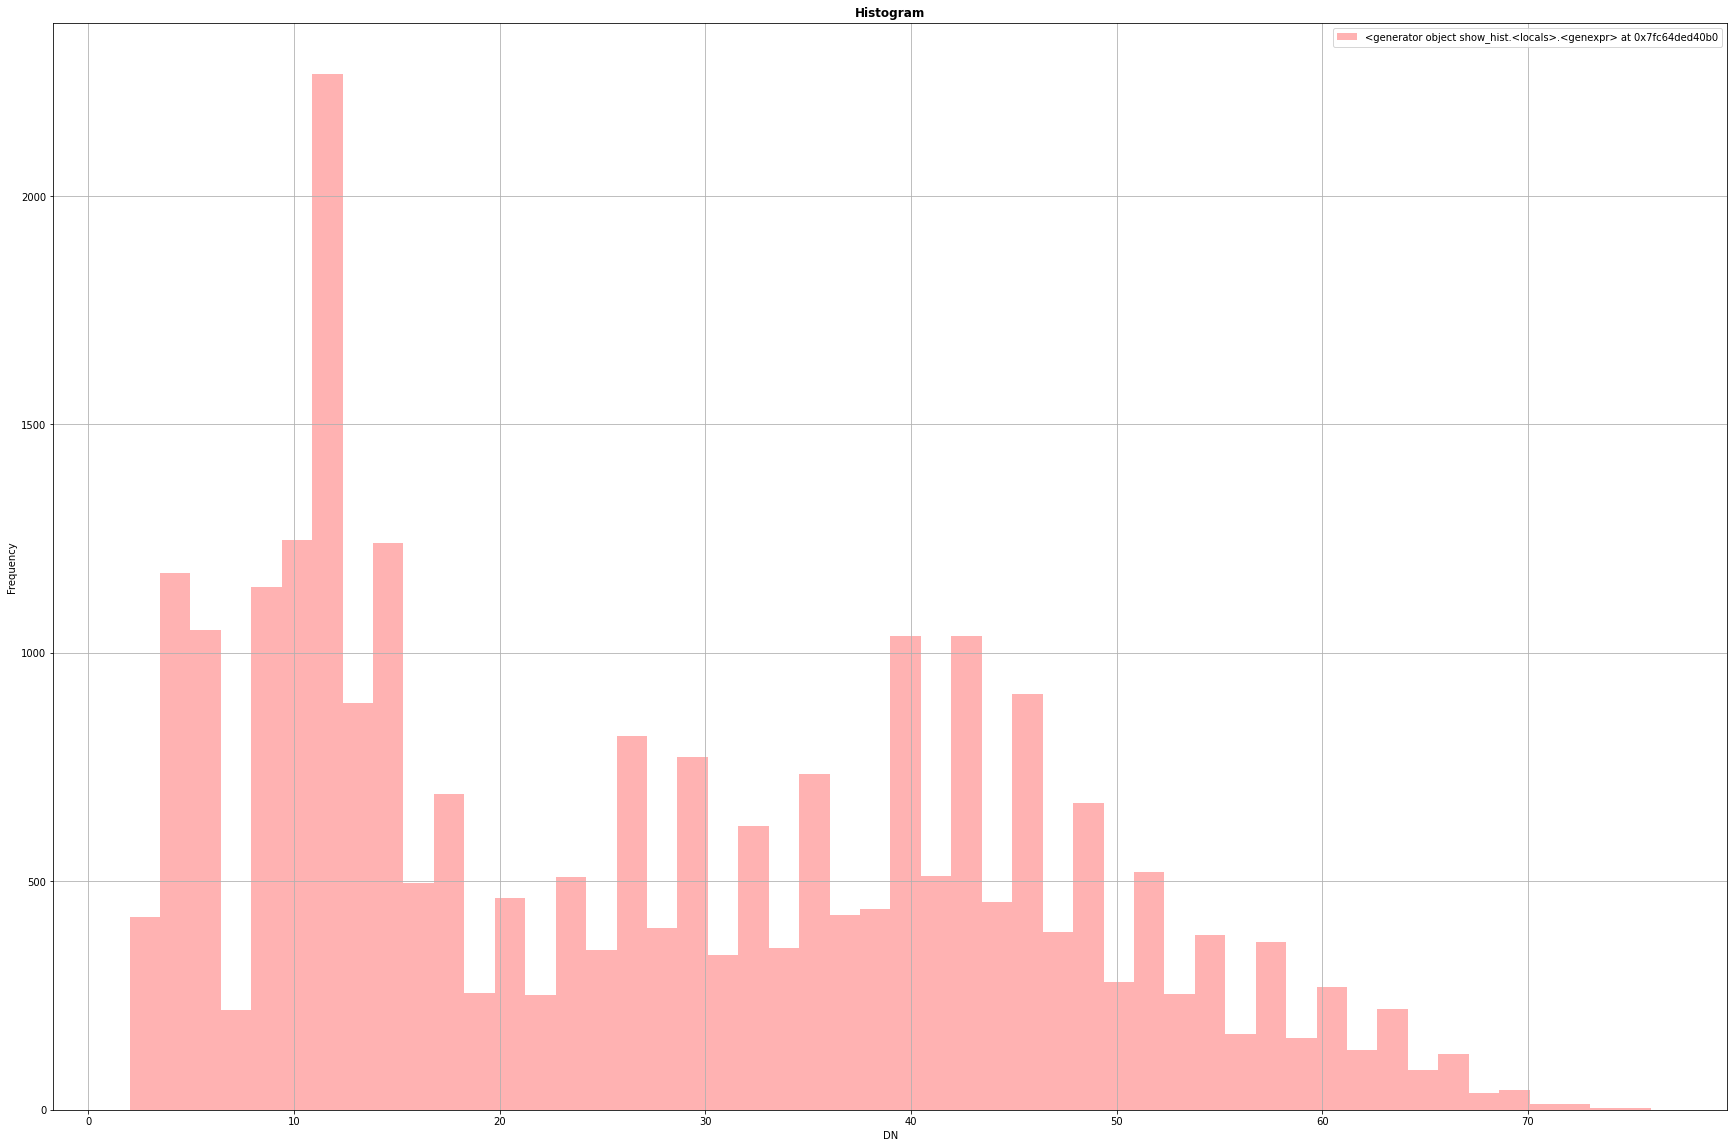

In [14]:
from rasterio.plot import show_hist
show_hist(src, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram")

In [89]:
# fig, (ax1, ax2) = plt.subplot(211)
# # show((src, 1), cmap='Greens_r', interpolation='none', ax=ax1)


<AxesSubplot:>

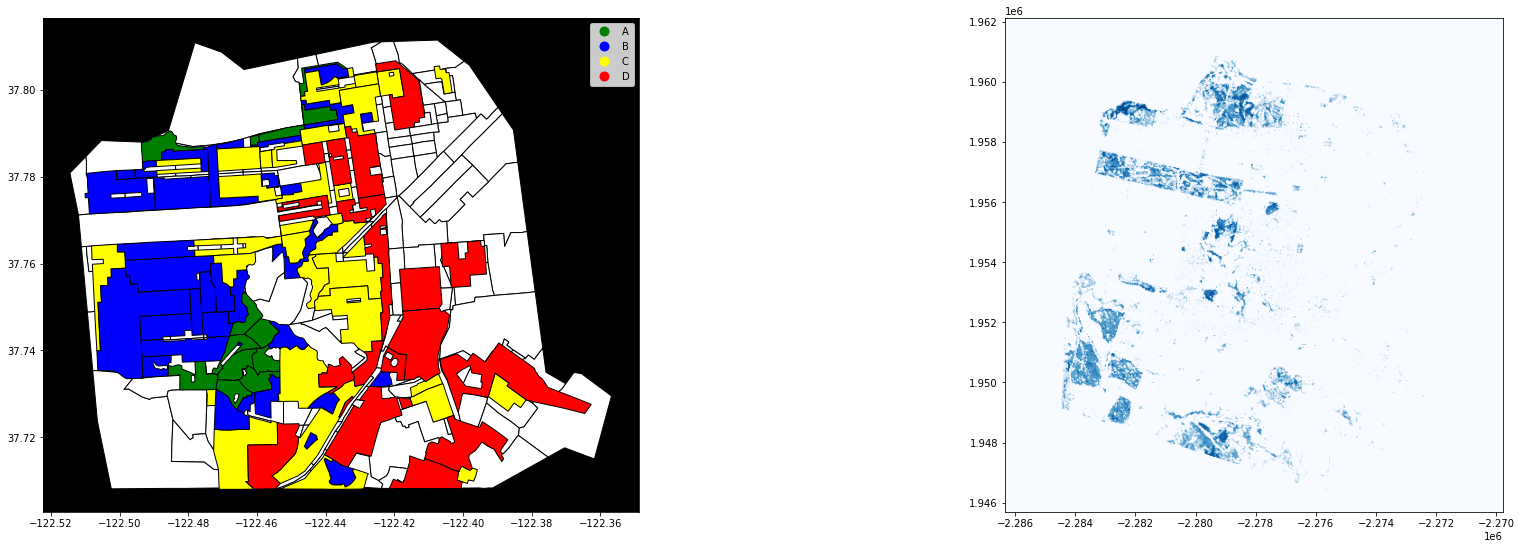

In [10]:
fig = plt.figure()

ax1=plt.subplot(2, 2, 1)
ax1.set_facecolor('black')

ax2=plt.subplot(2, 2, 2)
ax2.set_facecolor('white')

base = sf_county_3.plot(ax = ax1,figsize=(15, 15), color='white')
sf.plot(ax =ax1, column = 'holc_grade', cmap = holc_cmap, legend = True, figsize=[18, 10])
show((src, 1), cmap='Blues', ax=ax2)
# show(src, ax=base, cmap='Blues')


In [15]:
import arcpy
from arcpy import env

# Set environment settings
env.workspace = "CA_trees2016/2016_tree_canopy_SF.tif"

# Set local variables
inRaster = "zone"
outPolygons = "zones.shp"
field = "VALUE"

# Execute RasterToPolygon
arcpy.RasterToPolygon_conversion(inRaster, outPolygons, "NO_SIMPLIFY", field)

ModuleNotFoundError: No module named 'arcpy'